# LOGISTIC REGRESSION WITH L2 REGULARIZATION

# `Algorithm`
## `Goal to maximize log likelihood function`

### `Log Likelihood simplified form:`
### $$\ell\ell(\mathbf{w}) = \sum_{i=1}^N \Big( (y^{(i)} - 1)\mathbf{w}^T \mathbf{x}^{(i)} - \ln\left(1 + \exp(-\mathbf{w}^T \mathbf{x}^{(i)}\right) \Big)\color{red}{-\lambda\|\mathbf{w}\|_2^2} $$
$$P(\mathbf{x}^{(i)}, \mathbf{w}) = \frac{\mbox 1}{\mbox 1 + e^{-\mathbf{w}^T\mathbf{x}^{(i)}}}$$
<br></br>
### `Gradient Ascent step:`
### $$ \mathbf{w}^{new} = \mathbf{w}^{old} + \lambda \mathbf{X}^T(y^{(i)} - P(\mathbf{X},\mathbf{w})) \color{red}{-2\lambda \mathbf{w} } $$

In [4]:
class LogisticRegression:
    def __init__(self, l2=0.01, step_size=1e-6, n_rounds=150):
        self.l2 = l2
        self.step_size = step_size
        self.n_rounds = n_rounds
        
    def cost_function_with_l2(self, X, y, l2_penalty, coefficients):
        scores = X @ coefficients
        logexp = np.log(1.0 + np.exp(-scores))

        # Simple check to prevent overflow
        mask = np.isinf(logexp)
        logexp[mask] = -scores[mask]

        return np.sum((y-1)*scores - logexp) - l2_penalty*np.sum(coefficients[1:]**2)
    
    def predict(self, X):
        return X @ self.weights
    
    def fit(self, X, y):
        weights = np.zeros(X.shape[1])
        cost_history = list()
        for itr in range(self.n_rounds):
            penalty = (2 * self.l2 * weights)
            penalty[0] = 0
            
            errors = y - self._sigmoid(X, weights)
            weights = weights + self.step_size * ((X.T @ errors) - penalty)
            
            logloss = self.cost_function_with_l2(X, y, self.l2, weights)
            cost_history.append(logloss)
        
        self.weights = weights
        return (weights, cost_history)

    def _sigmoid(self, X, w):
        return 1/(1 + np.exp(-X @ w))

## Predict product review sentiment

In [5]:
import pandas as pd
import numpy as np

### Load and explore data

In [6]:
products = pd.read_csv("./data/amazon_baby_subset.csv")

In [7]:
products.head()

name  \
0  Stop Pacifier Sucking without tears with Thumb...   
1    Nature's Lullabies Second Year Sticker Calendar   
2    Nature's Lullabies Second Year Sticker Calendar   
3                        Lamaze Peekaboo, I Love You   
4  SoftPlay Peek-A-Boo Where's Elmo A Children's ...   

                                              review  rating  sentiment  
0  All of my kids have cried non-stop when I trie...       5          1  
1  We wanted to get something to keep track of ou...       5          1  
2  My daughter had her 1st baby over a year ago. ...       5          1  
3  One of baby's first and favorite books, and it...       4          1  
4  Very cute interactive book! My son loves this ...       5          1

In [8]:
products["sentiment"] = products["sentiment"].apply(lambda x: x if x==1 else 0)
print('# of positive reviews =', len(products[products['sentiment']==1]))
print('# of negative reviews =', len(products[products['sentiment']==0]))

# of positive reviews = 26579
# of negative reviews = 26493


In [9]:
products["review"].isnull().sum()

241

In [10]:
products["review"] = products["review"].fillna("")

### Apply text cleaning on the review data

In [18]:
import json
with open('w./data/important_words.json', 'r') as f: # Reads the list of most frequent words
    important_words = json.load(f)
important_words = [str(s) for s in important_words]

FileNotFoundError: [Errno 2] No such file or directory: './data/important_words.json'

In [12]:
import string 
def remove_punctuation(text):
    translator = text.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    return text

products['review_clean'] = products['review'].apply(remove_punctuation)

### Calculate words frequency

In [13]:
for word in important_words:
    products[word] = products['review_clean'].apply(lambda s : s.split().count(word))

NameError: name 'important_words' is not defined

In [14]:
train = products.sample(frac=0.7, random_state=12) 
test = products.drop(train.index)

In [15]:
def get_numpy_data(df, features, label):
    df['intercept'] = 1
    features = ['intercept'] + features
    features_df = df[features]
    return(np.array(features_df), np.array(df[label]))

In [16]:
X_train, y_train = get_numpy_data(train, important_words, 'sentiment') 
X_test, y_test = get_numpy_data(test, important_words, 'sentiment') 

NameError: name 'important_words' is not defined

# Explore effects of L2 regularization

In [17]:
# run with L2 = 0
log_reg_l2_0 = LogisticRegression(l2=0, step_size=5e-6, n_rounds=300)
coefficients_0_penalty, cost_history_0_penalty  = log_reg_l2_0.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [15]:
# run with L2 = 4
log_reg_l2_4 = LogisticRegression(l2=4, step_size=5e-6, n_rounds=300)
coefficients_4_penalty, cost_history_4_penalty  = log_reg_l2_4.fit(X_train, y_train)

In [16]:
# run with L2 = 10
log_reg_l2_10 = LogisticRegression(l2=10, step_size=5e-6, n_rounds=300)
coefficients_10_penalty, cost_history_10_penalty= log_reg_l2_10.fit(X_train, y_train)

In [17]:
# run with L2 = 1e2
log_reg_l2_1e2 = LogisticRegression(l2=1e2, step_size=5e-6, n_rounds=300)
coefficients_1e2_penalty, cost_history_1e2_penalty  = log_reg_l2_1e2.fit(X_train, y_train)

In [18]:
# run with L2 = 1e3
log_reg_l2_1e3 = LogisticRegression(l2=1e3, step_size=5e-6, n_rounds=300)
coefficients_1e3_penalty, cost_history_1e3_penalty  = log_reg_l2_1e3.fit(X_train, y_train)

In [19]:
# run with L2 = 1e5
log_reg_l2_1e5 = LogisticRegression(l2=1e5, step_size=5e-6, n_rounds=300)
coefficients_1e5_penalty, cost_history_1e5_penalty  = log_reg_l2_1e5.fit(X_train, y_train)

## Compare coefficients

In [20]:
table = pd.DataFrame({'word': ['(intercept)'] + important_words})
def add_coefficients_to_table(coefficients, column_name):
    table[column_name] = coefficients
    return table

In [21]:
add_coefficients_to_table(coefficients_0_penalty, 'coefficients [L2=0]')
add_coefficients_to_table(coefficients_4_penalty, 'coefficients [L2=4]')
add_coefficients_to_table(coefficients_10_penalty, 'coefficients [L2=10]')
add_coefficients_to_table(coefficients_1e2_penalty, 'coefficients [L2=1e2]')
add_coefficients_to_table(coefficients_1e3_penalty, 'coefficients [L2=1e3]')
add_coefficients_to_table(coefficients_1e5_penalty, 'coefficients [L2=1e5]')

word  coefficients [L2=0]  coefficients [L2=4]  \
0    (intercept)            -0.044295            -0.043946   
1           baby             0.088289             0.088059   
2            one             0.008051             0.007917   
3          great             0.715559             0.712470   
4           love             0.850838             0.846745   
..           ...                  ...                  ...   
189       babies             0.039279             0.039094   
190          won             0.003921             0.003897   
191          tub            -0.122986            -0.122324   
192       almost            -0.006335            -0.006311   
193       either            -0.153571            -0.152721   

     coefficients [L2=10]  coefficients [L2=1e2]  coefficients [L2=1e3]  \
0               -0.043426              -0.036091               0.004836   
1                0.087717               0.083060               0.058379   
2                0.007716               0.005000              -0.006761   
3                0.707887               0.645686               0.353048   
4                0.840672               0.758396               0.383412   
..                    ...                    ...                    ...   
189              0.038819               0.035095               0.017948   
190              0.003862               0.003381               0.001356   
191             -0.121342              -0.107986              -0.047342   
192             -0.006274              -0.005755              -0.002685   
193             -0.151459              -0.134265              -0.056384   

     coefficients [L2=1e5]  
0                 0.011405  
1                 0.001487  
2                -0.001501  
3                 0.007851  
4                 0.007906  
..                     ...  
189               0.000316  
190               0.000020  
191              -0.000718  
192              -0.000084  
193              -0.000908  

[194 rows x 7 columns]

### Get top 5 positive and negative words

In [22]:
positive_words = table[["word", "coefficients [L2=0]"]].sort_values(by="coefficients [L2=0]", ascending=False)["word"][0:5]

In [23]:
negative_words = table[["word", "coefficients [L2=0]"]].sort_values(by="coefficients [L2=0]")["word"][0:5]

## Vizualize coefficiets path

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 8

def make_coefficient_plot(table, positive_words, negative_words, l2_penalty_list):
    positive_words = np.array(positive_words)
    negative_words = np.array(negative_words)
    cmap_positive = plt.get_cmap('Reds')
    cmap_negative = plt.get_cmap('Blues')
    
    xx = l2_penalty_list
    plt.plot(xx, [0.]*len(xx), '--', lw=1, color='k')
    
    table_positive_words = table[table.word.isin(positive_words)]
    table_negative_words = table[table.word.isin(negative_words)]
    del table_positive_words['word']
    del table_negative_words['word']
    
    for i in range(len(positive_words)):
        color = cmap_positive(0.8*((i+1)/(len(positive_words)*1.2)+0.15))
        plt.plot(xx, np.array(table_positive_words[i:i+1]).flatten(), '-', 
                 label=positive_words[i], linewidth=4.0, color=color)
        
    for i in range(len(negative_words)):
        color = cmap_negative(0.8*((i+1)/(len(negative_words)*1.2)+0.15))
        plt.plot(xx, np.array(table_negative_words[i:i+1]).flatten(),
                 '-', label=negative_words[i], linewidth=4.0, color=color)
        
    plt.legend(loc='best', ncol=3, prop={'size':16}, columnspacing=0.5)
    plt.axis([1, 1e5, -1, 2])
    plt.title('Coefficient path')
    plt.xlabel('L2 penalty ($\lambda$)')
    plt.ylabel('Coefficient value')
    plt.xscale('log')
    plt.rcParams.update({'font.size': 18})
    plt.tight_layout()

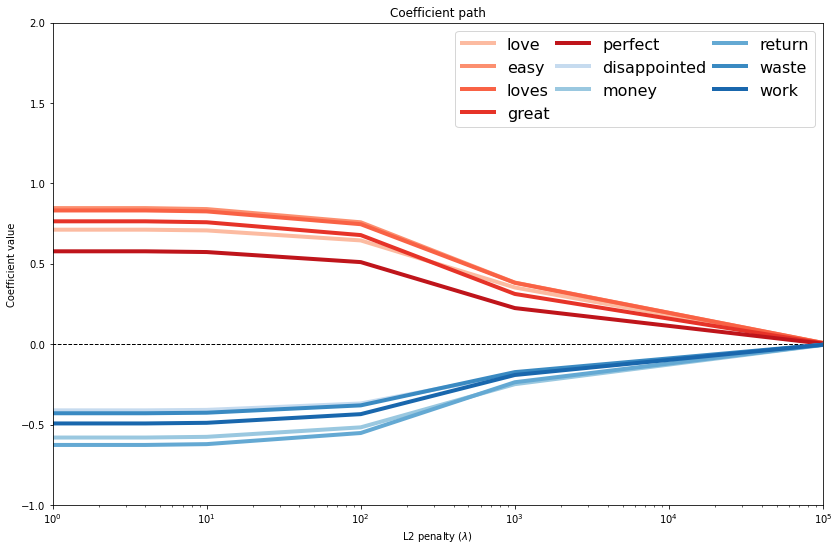

In [25]:
make_coefficient_plot(table, positive_words, negative_words, l2_penalty_list=[0, 4, 10, 1e2, 1e3, 1e5])

## Measuring accuracy

$$
\mbox{accuracy} = \frac{\mbox{# correctly classified data points}}{\mbox{# total data points}}
$$


In [26]:
def get_classification_accuracy(X, y, coefficients):
    scores = X @ coefficients
    apply_threshold = np.vectorize(lambda x: 1 if x > 0  else 0)
    predictions = apply_threshold(scores)
    
    num_correct = (predictions == y).sum()
    accuracy = num_correct / len(X)    
    return accuracy

In [27]:
train_accuracy = {}
train_accuracy[0]   = get_classification_accuracy(X_train, y_train, coefficients_0_penalty)
train_accuracy[4]   = get_classification_accuracy(X_train, y_train, coefficients_4_penalty)
train_accuracy[10]  = get_classification_accuracy(X_train, y_train, coefficients_10_penalty)
train_accuracy[1e2] = get_classification_accuracy(X_train, y_train, coefficients_1e2_penalty)
train_accuracy[1e3] = get_classification_accuracy(X_train, y_train, coefficients_1e3_penalty)
train_accuracy[1e5] = get_classification_accuracy(X_train, y_train, coefficients_1e5_penalty)

test_accuracy = {}
test_accuracy[0]   = get_classification_accuracy(X_test, y_test, coefficients_0_penalty)
test_accuracy[4]   = get_classification_accuracy(X_test, y_test, coefficients_4_penalty)
test_accuracy[10]  = get_classification_accuracy(X_test, y_test, coefficients_10_penalty)
test_accuracy[1e2] = get_classification_accuracy(X_test, y_test, coefficients_1e2_penalty)
test_accuracy[1e3] = get_classification_accuracy(X_test, y_test, coefficients_1e3_penalty)
test_accuracy[1e5] = get_classification_accuracy(X_test, y_test, coefficients_1e5_penalty)

In [31]:
# Build a simple report
for key in sorted(test_accuracy.keys()):
    print("L2 penalty = %g" % key)
    print("train accuracy = %s, test_accuracy = %s" % (train_accuracy[key], test_accuracy[key]))
    print("--------------------------------------------------------------------------------")

L2 penalty = 0
train accuracy = 0.7785195154777927, test_accuracy = 0.7767868358246451
--------------------------------------------------------------------------------
L2 penalty = 4
train accuracy = 0.778492597577389, test_accuracy = 0.776724029644517
--------------------------------------------------------------------------------
L2 penalty = 10
train accuracy = 0.778492597577389, test_accuracy = 0.7764728049240045
--------------------------------------------------------------------------------
L2 penalty = 100
train accuracy = 0.77814266487214, test_accuracy = 0.7765984172842608
--------------------------------------------------------------------------------
L2 penalty = 1000
train accuracy = 0.7720323014804845, test_accuracy = 0.7737721391784952
--------------------------------------------------------------------------------
L2 penalty = 100000
train accuracy = 0.6642799461641992, test_accuracy = 0.6590880542645396
-------------------------------------------------------------------

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 6

sorted_list = sorted(train_accuracy.items(), key=lambda x:x[0])
plt.plot([p[0] for p in sorted_list], [p[1] for p in sorted_list], '-', linewidth=4, label='Training accuracy')
sorted_list = sorted(test_accuracy.items(), key=lambda x:x[0])
plt.plot([p[0] for p in sorted_list], [p[1] for p in sorted_list], '-', linewidth=4, label='Test accuracy')
plt.xscale('symlog')
plt.axis([0, 1e3, 0.78, 0.786])
plt.legend(loc='lower left')
plt.rcParams.update({'font.size': 18})
plt.tight_layout

NameError: name 'train_accuracy' is not defined